### An analysis to find out the most significant impact player in a cricket match
#### For analysis 2011 Cricket world cup final is taken
#### The 2011 Cricket World Cup Final was the final match of the 2011 Men's Cricket World Cup, the 10th edition of ICC's championship of One Day International cricket. The match was played between India and Sri Lanka at the Wankhede Stadium, Mumbai, India on Saturday 2 April 2011.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
from pprint import pprint
import scipy.cluster.hierarchy as shc
import math

#### importing data collected from publically availabe source.
Source : kaggle

In [2]:
odi_men = pd.read_csv(r"C:\Users\Jpamb\Desktop\task\archive\Cricket statsguru-data\Men ODI Player Innings Stats - 21st Century.csv")
odi_men.head()
odi_men.columns

Index(['Innings Player', 'Innings Runs Scored', 'Innings Runs Scored Num',
       'Innings Minutes Batted', 'Innings Batted Flag', 'Innings Not Out Flag',
       'Innings Balls Faced', 'Innings Boundary Fours',
       'Innings Boundary Sixes', 'Innings Batting Strike Rate',
       'Innings Number', 'Opposition', 'Ground', 'Innings Date', 'Country',
       '50's', '100's', 'Innings Runs Scored Buckets', 'Innings Overs Bowled',
       'Innings Bowled Flag', 'Innings Maidens Bowled',
       'Innings Runs Conceded', 'Innings Wickets Taken', '4 Wickets',
       '5 Wickets', '10 Wickets', 'Innings Wickets Taken Buckets',
       'Innings Economy Rate'],
      dtype='object')

### Data Preprocessing and Feature Engineering
Filtering out required columns only

In [3]:
odi_men = odi_men[['Innings Player', 'Innings Runs Scored Num',
       'Innings Minutes Batted', 'Innings Batted Flag', 'Innings Not Out Flag',
       'Innings Balls Faced','Innings Batting Strike Rate', 'Opposition', 'Ground', 'Innings Date', 'Country',
        'Innings Overs Bowled','Innings Bowled Flag','Innings Runs Conceded', 'Innings Wickets Taken','Innings Economy Rate']]
odi_men.head()



,Innings Player,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Batting Strike Rate,Opposition,Ground,Innings Date,Country,Innings Overs Bowled,Innings Bowled Flag,Innings Runs Conceded,Innings Wickets Taken,Innings Economy Rate
0,JJ Roy,180,151,1.0,0.0,151,119.20,v Australia,Melbourne,2018/01/14,England,NaN,NaN,NaN,NaN,NaN
1,AD Hales,171,166,1.0,0.0,122,140.16,v Pakistan,Nottingham,2016/08/30,England,NaN,NaN,NaN,NaN,NaN
2,JJ Roy,162,172,1.0,0.0,118,137.28,v Sri Lanka,The Oval,2016/06/29,England,NaN,NaN,NaN,NaN,NaN
3,AJ Strauss,158,188,1.0,0.0,145,108.96,v India,Bengaluru,2011/02/27,England,NaN,NaN,NaN,NaN,NaN
4,AJ Strauss,154,201,1.0,0.0,140,110.00,v Bangladesh,Birmingham,2010/07/12,England,NaN,NaN,NaN,NaN,NaN


As for analysis we filter team India at first

In [4]:
# team India
ind_df = odi_men.loc[odi_men['Innings Player'].isin(['V Sehwag','SR Tendulkar','G Gambhir','V Kohli', 'MS Dhoni', 
                                                     'Yuvraj Singh', 'SK Raina', 'Harbhajan Singh','Z Khan', 
                                                     'MM Patel', 'S Sreesanth']) ]
ind_df = ind_df.loc[(ind_df['Innings Batted Flag'] == 1.0) | (ind_df['Innings Bowled Flag'] == 1.0)]
ind_df

,Innings Player,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Batting Strike Rate,Opposition,Ground,Innings Date,Country,Innings Overs Bowled,Innings Bowled Flag,Innings Runs Conceded,Innings Wickets Taken,Innings Economy Rate
38086,V Sehwag,219,208,1.0,0.0,149,146.97,v West Indies,Indore,2011/12/08,India,NaN,NaN,NaN,NaN,NaN
38089,SR Tendulkar,200,226,1.0,1.0,147,136.05,v South Africa,Gwalior,2010/02/24,India,NaN,NaN,NaN,NaN,NaN
38090,MS Dhoni,183,210,1.0,1.0,145,126.20,v Sri Lanka,Jaipur,2005/10/31,India,NaN,NaN,NaN,NaN,NaN
38091,V Kohli,183,211,1.0,0.0,148,123.64,v Pakistan,Dhaka,2012/03/18,India,NaN,NaN,NaN,NaN,NaN
38092,SR Tendulkar,175,210,1.0,0.0,141,124.11,v Australia,Hyderabad (Deccan),2009/11/05,India,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274417,MM Patel,NaN,NaN,NaN,NaN,NaN,NaN,v Australia,Hyderabad (Deccan),2009/11/05,India,9.0,1.0,73,0,8.11
274419,S Sreesanth,NaN,NaN,NaN,NaN,NaN,NaN,v Pakistan,Lahore,2006/02/13,India,10.0,1.0,74,0,7.40
274426,MM Patel,NaN,NaN,NaN,NaN,NaN,NaN,v New Zealand,Christchurch,2009/03/08,India,7.2,1.0,79,0,10.77
274429,S Sreesanth,NaN,NaN,NaN,NaN,NaN,NaN,v South Africa,Ahmedabad,2010/02/27,India,9.0,1.0,83,0,9.22


In [5]:
# team Sril Lanka
sl_df = odi_men.loc[odi_men['Innings Player'].isin(['WU Tharanga', 'TM Dilshan', 'KC Sangakkara', 'DPMD Jayawardene', 
                                                    'TT Samaraweera', 'CK Kapugedera', 'KMDN Kulasekara', 'NLTC Perera',
                                                   'SL Malinga', 'S Randiv', 'M Muralitharan'])]
sl_df = sl_df.loc[(sl_df['Innings Batted Flag'] == 1.0) | (sl_df['Innings Bowled Flag'] == 1.0)]
sl_df

,Innings Player,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Batting Strike Rate,Opposition,Ground,Innings Date,Country,Innings Overs Bowled,Innings Bowled Flag,Innings Runs Conceded,Innings Wickets Taken,Innings Economy Rate
63715,WU Tharanga,174,228,1.0,1.0,159,109.43,v India,Kingston,2013/07/02,Sri Lanka,NaN,NaN,NaN,NaN,NaN
63716,KC Sangakkara,169,200,1.0,0.0,137,123.35,v South Africa,Colombo (RPS),2013/07/20,Sri Lanka,NaN,NaN,NaN,NaN,NaN
63717,TM Dilshan,161,221,1.0,1.0,146,110.27,v Bangladesh,Melbourne,2015/02/26,Sri Lanka,NaN,NaN,NaN,NaN,NaN
63718,TM Dilshan,160,202,1.0,1.0,165,96.96,v India,Hobart,2012/02/28,Sri Lanka,NaN,NaN,NaN,NaN,NaN
63719,TM Dilshan,160,186,1.0,0.0,124,129.03,v India,Rajkot,2009/12/15,Sri Lanka,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299499,KMDN Kulasekara,NaN,NaN,NaN,NaN,NaN,NaN,v England,Lord's,2014/05/31,Sri Lanka,10.0,1.0,81,0,8.10
299502,SL Malinga,NaN,NaN,NaN,NaN,NaN,NaN,v India,Hambantota,2012/07/21,Sri Lanka,10.0,1.0,83,0,8.30
299503,SL Malinga,NaN,NaN,NaN,NaN,NaN,NaN,v New Zealand,Christchurch,2015/02/14,Sri Lanka,10.0,1.0,84,0,8.40
299504,SL Malinga,NaN,NaN,NaN,NaN,NaN,NaN,v South Africa,Hambantota,2014/07/12,Sri Lanka,10.0,1.0,85,0,8.50


In [6]:
sl_df['Date'] = pd.to_datetime(sl_df['Innings Date'])
sl_df.sort_values(by='Date')

,Innings Player,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Batting Strike Rate,Opposition,Ground,Innings Date,Country,Innings Overs Bowled,Innings Bowled Flag,Innings Runs Conceded,Innings Wickets Taken,Innings Economy Rate,Date
65744,KC Sangakkara,16,10,1.0,1.0,10,160.00,v South Africa,Paarl,2001/01/09,Sri Lanka,NaN,NaN,NaN,NaN,NaN,2001-01-09
190176,M Muralitharan,NaN,NaN,NaN,NaN,NaN,NaN,v South Africa,Paarl,2001/01/09,Sri Lanka,10.0,1.0,39,0,3.90,2001-01-09
174556,DPMD Jayawardene,22,20,1.0,0.0,16,137.50,v South Africa,Paarl,2001/01/09,Sri Lanka,NaN,NaN,NaN,NaN,NaN,2001-01-09
174956,KC Sangakkara,16,10,1.0,1.0,10,160.00,v South Africa,Paarl,2001/01/09,Sri Lanka,NaN,NaN,NaN,NaN,NaN,2001-01-09
65344,DPMD Jayawardene,22,20,1.0,0.0,16,137.50,v South Africa,Paarl,2001/01/09,Sri Lanka,NaN,NaN,NaN,NaN,NaN,2001-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174012,NLTC Perera,36,-,1.0,0.0,25,144.00,v West Indies,Hambantota,2020/02/26,Sri Lanka,NaN,NaN,NaN,NaN,NaN,2020-02-26
190426,NLTC Perera,NaN,NaN,NaN,NaN,NaN,NaN,v West Indies,Pallekele,2020/03/01,Sri Lanka,7.3,1.0,54,0,7.20,2020-03-01
81214,NLTC Perera,NaN,NaN,NaN,NaN,NaN,NaN,v West Indies,Pallekele,2020/03/01,Sri Lanka,7.3,1.0,54,0,7.20,2020-03-01
173943,NLTC Perera,38,-,1.0,0.0,31,122.58,v West Indies,Pallekele,2020/03/01,Sri Lanka,NaN,NaN,NaN,NaN,NaN,2020-03-01


In [7]:
ind_df['Date'] = pd.to_datetime(ind_df['Innings Date'])
ind_df.sort_values(by='Date')

,Innings Player,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Batting Strike Rate,Opposition,Ground,Innings Date,Country,Innings Overs Bowled,Innings Bowled Flag,Innings Runs Conceded,Innings Wickets Taken,Innings Economy Rate,Date
148546,SR Tendulkar,35,47,1.0,0.0,26,134.61,v Australia,Bengaluru,2001/03/25,India,NaN,NaN,NaN,NaN,NaN,2001-03-25
42038,Harbhajan Singh,0,2,1.0,0.0,1,0.00,v Australia,Bengaluru,2001/03/25,India,NaN,NaN,NaN,NaN,NaN,2001-03-25
257035,V Sehwag,58,62,1.0,0.0,54,107.40,v Australia,Bengaluru,2001/03/25,India,NaN,NaN,NaN,NaN,NaN,2001-03-25
151261,Harbhajan Singh,0,2,1.0,0.0,1,0.00,v Australia,Bengaluru,2001/03/25,India,NaN,NaN,NaN,NaN,NaN,2001-03-25
53390,V Sehwag,NaN,NaN,NaN,NaN,NaN,NaN,v Australia,Bengaluru,2001/03/25,India,9.0,1.0,59,3,6.55,2001-03-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40313,V Kohli,15,31,1.0,0.0,25,60.00,v New Zealand,Auckland,2020/02/08,India,NaN,NaN,NaN,NaN,NaN,2020-02-08
149536,V Kohli,15,31,1.0,0.0,25,60.00,v New Zealand,Auckland,2020/02/08,India,NaN,NaN,NaN,NaN,NaN,2020-02-08
259085,V Kohli,9,20,1.0,0.0,12,75.00,v New Zealand,Mount Maunganui,2020/02/11,India,NaN,NaN,NaN,NaN,NaN,2020-02-11
40804,V Kohli,9,20,1.0,0.0,12,75.00,v New Zealand,Mount Maunganui,2020/02/11,India,NaN,NaN,NaN,NaN,NaN,2020-02-11


### Feature Selection

From the India and Sri Lanka team we select the data where they played against. Only this data is used for clustering

In [8]:
ind_df = ind_df.loc[ind_df['Opposition'] == 'v Sri Lanka']
ind_df_prc = ind_df[['Innings Player', 'Innings Runs Scored Num', 'Innings Batting Strike Rate', 'Innings Balls Faced', 'Innings Not Out Flag',
                    'Innings Overs Bowled','Innings Runs Conceded', 'Innings Wickets Taken','Innings Economy Rate', 'Ground',
                    'Innings Batted Flag', 'Innings Bowled Flag' ]]
ind_df_prc = ind_df_prc.fillna(0)

sl_df = sl_df.loc[sl_df['Opposition'] == 'v India']
sl_df_prc = sl_df[['Innings Player', 'Innings Runs Scored Num', 'Innings Batting Strike Rate', 'Innings Balls Faced', 'Innings Not Out Flag',
                    'Innings Overs Bowled','Innings Runs Conceded', 'Innings Wickets Taken','Innings Economy Rate', 'Ground',
                    'Innings Batted Flag', 'Innings Bowled Flag' ]]
sl_df_prc = sl_df_prc.fillna(0)
df_prc = pd.concat([ind_df_prc, sl_df_prc], ignore_index=True)
df_prc

,Innings Player,Innings Runs Scored Num,Innings Batting Strike Rate,Innings Balls Faced,Innings Not Out Flag,Innings Overs Bowled,Innings Runs Conceded,Innings Wickets Taken,Innings Economy Rate,Ground,Innings Batted Flag,Innings Bowled Flag
0,MS Dhoni,183,126.20,145,1.0,0,0,0,0,Jaipur,1.0,0.0
1,G Gambhir,150,109.48,137,1.0,0,0,0,0,Kolkata,1.0,0.0
2,G Gambhir,150,102.04,147,0.0,0,0,0,0,Colombo (RPS),1.0,0.0
3,V Sehwag,146,143.13,102,0.0,0,0,0,0,Rajkot,1.0,0.0
4,V Kohli,139,110.31,126,1.0,0,0,0,0,Ranchi,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3526,KMDN Kulasekara,0,0,0,0.0,10.0,67,0,6.70,Dhaka,0.0,1.0
3527,KMDN Kulasekara,0,0,0,0.0,10.0,68,0,6.80,Colombo (RPS),0.0,1.0
3528,KMDN Kulasekara,0,0,0,0.0,8.0,71,0,8.87,Hobart,0.0,1.0
3529,SL Malinga,0,0,0,0.0,9.1,75,0,8.18,Kolkata,0.0,1.0


### Feature Engineering

'matches_batted' and 'matches_bowled' is created


In [9]:
stats = {}
for index, row in df_prc.iterrows():
    if row["Innings Player"] not in stats :
        stats[row["Innings Player"]] = {'runs' : int(row['Innings Runs Scored Num']), 
                                        'balls' : int(row['Innings Balls Faced']) ,
                                        'not_out' : 1, 'num_of_matches' : 1 ,
                                       'matches_batted' : 0, 'matches_bowled' : 0 ,
                                       'overs_bowled' : float(row['Innings Overs Bowled']),
                                       'runs_conceded' : int(row['Innings Runs Conceded']),
                                       'wickets' : int(row['Innings Wickets Taken'])}
        if row['Innings Not Out Flag'] == 0.0 :
            stats[row["Innings Player"]]['not_out' ] = 0
    else :
        stats[row["Innings Player"]]['runs'] += int(row['Innings Runs Scored Num'])
        stats[row["Innings Player"]]['balls'] += int(row['Innings Balls Faced'])
        stats[row["Innings Player"]]['not_out'] += int(row['Innings Not Out Flag'])
        stats[row["Innings Player"]]['num_of_matches'] += 1
        stats[row["Innings Player"]]['overs_bowled'] += float(row['Innings Overs Bowled'])
        stats[row["Innings Player"]]['runs_conceded'] += int(row['Innings Runs Conceded'])
        stats[row["Innings Player"]]['wickets'] += int(row['Innings Wickets Taken'])
        
    
    if row['Innings Batted Flag'] == 1.0 :
        stats[row["Innings Player"]]['matches_batted'] += 1
    if row['Innings Bowled Flag'] == 1.0 :
        stats[row["Innings Player"]]['matches_bowled'] += 1
        
print(stats)

{'MS Dhoni': {'runs': 7149, 'balls': 7935, 'not_out': 48, 'num_of_matches': 162, 'matches_batted': 159, 'matches_bowled': 3, 'overs_bowled': 12.0, 'runs_conceded': 51, 'wickets': 0}, 'G Gambhir': {'runs': 5004, 'balls': 5646, 'not_out': 9, 'num_of_matches': 108, 'matches_batted': 108, 'matches_bowled': 0, 'overs_bowled': 0.0, 'runs_conceded': 0, 'wickets': 0}, 'V Sehwag': {'runs': 5097, 'balls': 4626, 'not_out': 9, 'num_of_matches': 270, 'matches_batted': 156, 'matches_bowled': 114, 'overs_bowled': 573.0, 'runs_conceded': 2931, 'wickets': 54}, 'V Kohli': {'runs': 6660, 'balls': 7350, 'not_out': 27, 'num_of_matches': 171, 'matches_batted': 138, 'matches_bowled': 33, 'overs_bowled': 59.699999999999996, 'runs_conceded': 357, 'wickets': 0}, 'SR Tendulkar': {'runs': 4059, 'balls': 4662, 'not_out': 12, 'num_of_matches': 147, 'matches_batted': 111, 'matches_bowled': 36, 'overs_bowled': 177.0, 'runs_conceded': 945, 'wickets': 18}, 'Yuvraj Singh': {'runs': 4149, 'balls': 4971, 'not_out': 24, 'n

### extended FE

more aggregated features are derived

In [10]:
for player in stats :
    
    if stats[player]['matches_batted'] != 0 :
        stats[player]['strike_rate'] = stats[player]['runs'] / stats[player]['balls'] * 100
        stats[player]['avg']         = stats[player]['runs'] / stats[player]['matches_batted']
        stats[player]['not_out_rate']= stats[player]['not_out'] / stats[player]['matches_batted'] *100
    else :
        stats[player]['strike_rate'] = stats[player]['avg'] = stats[player]['not_out_rate'] = 0.0

    if stats[player]['matches_bowled'] != 0 :
        bowls = math.ceil((stats[player]['overs_bowled'] % int(stats[player]['overs_bowled'])) * 10)
        if bowls > 5 :
            stats[player]['overs_bowled'] = int(stats[player]['overs_bowled']) + ( (bowls//6) + ( (bowls - (bowls//6) * 6)  / 10) )
            
        stats[player]['economy']     = stats[player]['runs_conceded'] / stats[player]['overs_bowled']
        stats[player]['avg_wkts_per_match'] = stats[player]['wickets'] / stats[player]['matches_bowled']
        
    else :
        stats[player]['economy'] = stats[player]['avg_wkts_per_match'] = 0.0
        
# print(stats)

In [11]:
stats_df = pd.DataFrame()
for i in stats :
    stats[i].update({'player' : i})
    # stats_df = stats_df.append(pd.DataFrame.from_dict([stats[i]]), ignore_index=True)
    stats_df = pd.concat([stats_df, pd.DataFrame.from_dict([stats[i]])], ignore_index=True)
print(stats_df)

    runs  balls  not_out  num_of_matches  matches_batted  matches_bowled  \
0   7149   7935       48             162             159               3   
1   5004   5646        9             108             108               0   
2   5097   4626        9             270             156             114   
3   6660   7350       27             171             138              33   
4   4059   4662       12             147             111              36   
5   4149   4971       24             210             141              69   
6   3846   4068       30             201             141              60   
7    384    582       12             189              54             135   
8    420    702       12             189              66             123   
9     90    105       12              60              18              42   
10    15     57        6              45               9              36   
11  3684   4413        9             129             129               0   
12  6762   7

In [12]:
cluster_df = stats_df[['player', 'strike_rate', 'avg' , 'economy' , 'avg_wkts_per_match']]
cluster_df

,player,strike_rate,avg,economy,avg_wkts_per_match
0,MS Dhoni,90.094518,44.962264,4.250000,0.000000
1,G Gambhir,88.629118,46.333333,0.000000,0.000000
2,V Sehwag,110.181582,32.673077,5.115183,0.473684
3,V Kohli,90.612245,48.260870,5.940100,0.000000
4,SR Tendulkar,87.065637,36.567568,5.338983,0.500000
5,Yuvraj Singh,83.464092,29.425532,4.868204,0.739130
6,SK Raina,94.542773,27.276596,5.129534,0.250000
7,Z Khan,65.979381,7.111111,4.991186,1.444444
8,Harbhajan Singh,59.829060,6.363636,4.134809,1.390244
9,MM Patel,85.714286,5.000000,4.508475,1.285714


#### Rating for batters and bowlers

In [13]:
batting_rate = []
bowling_rate = []
for index, row in cluster_df.iterrows():
    if row['economy'] * row['avg_wkts_per_match'] != 0.0 : 
        bowling_rate.append(row['economy'] * row['avg_wkts_per_match'] / (row['economy'] / row['avg_wkts_per_match']))
    else :
        bowling_rate.append( row['economy'] * row['avg_wkts_per_match'])
    batting_rate.append( row['strike_rate'] / row['avg'])

# cluster_df['batting_rate'] = batting_rate
cluster_df = cluster_df.assign(batting_rate=batting_rate)
# cluster_df['bowling_rate']  = bowling_rate
cluster_df = cluster_df.assign(bowling_rate=bowling_rate)
cluster_df

,player,strike_rate,avg,economy,avg_wkts_per_match,batting_rate,bowling_rate
0,MS Dhoni,90.094518,44.962264,4.250000,0.000000,2.003781,0.000000
1,G Gambhir,88.629118,46.333333,0.000000,0.000000,1.912859,0.000000
2,V Sehwag,110.181582,32.673077,5.115183,0.473684,3.372244,0.224377
3,V Kohli,90.612245,48.260870,5.940100,0.000000,1.877551,0.000000
4,SR Tendulkar,87.065637,36.567568,5.338983,0.500000,2.380952,0.250000
5,Yuvraj Singh,83.464092,29.425532,4.868204,0.739130,2.836451,0.546314
6,SK Raina,94.542773,27.276596,5.129534,0.250000,3.466077,0.062500
7,Z Khan,65.979381,7.111111,4.991186,1.444444,9.278351,2.086420
8,Harbhajan Singh,59.829060,6.363636,4.134809,1.390244,9.401709,1.932778
9,MM Patel,85.714286,5.000000,4.508475,1.285714,17.142857,1.653061


#### Adding the player role columns

##### Source : espncricinfo

In [14]:
cluster_df = cluster_df.assign(batter=[1,1,1,1,1,0,1,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0])
cluster_df = cluster_df.assign(bowler=[0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,1,1,1])
cluster_df = cluster_df.assign(all_rounder=[0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0])
cluster_df

,player,strike_rate,avg,economy,avg_wkts_per_match,batting_rate,bowling_rate,batter,bowler,all_rounder
0,MS Dhoni,90.094518,44.962264,4.250000,0.000000,2.003781,0.000000,1,0,0
1,G Gambhir,88.629118,46.333333,0.000000,0.000000,1.912859,0.000000,1,0,0
2,V Sehwag,110.181582,32.673077,5.115183,0.473684,3.372244,0.224377,1,0,0
3,V Kohli,90.612245,48.260870,5.940100,0.000000,1.877551,0.000000,1,0,0
4,SR Tendulkar,87.065637,36.567568,5.338983,0.500000,2.380952,0.250000,1,0,0
5,Yuvraj Singh,83.464092,29.425532,4.868204,0.739130,2.836451,0.546314,0,0,1
6,SK Raina,94.542773,27.276596,5.129534,0.250000,3.466077,0.062500,1,0,0
7,Z Khan,65.979381,7.111111,4.991186,1.444444,9.278351,2.086420,0,1,0
8,Harbhajan Singh,59.829060,6.363636,4.134809,1.390244,9.401709,1.932778,0,1,0
9,MM Patel,85.714286,5.000000,4.508475,1.285714,17.142857,1.653061,0,1,0


### Correlating features

for unsupervised clustering a standard scale for batters, bowlers and all rounders is required

Scale is defined as : the percentage of difference between the best rating in the same catogory of the player

In [15]:
scale = []
for index, rows in cluster_df.iterrows() :
    if rows['batter'] == 1 :
        scale.append(abs(min(batting_rate) - rows['batting_rate']) / min(batting_rate) * 100)
    elif rows['bowler'] == 1:
        scale.append(abs(max(bowling_rate) - rows['bowling_rate']) / max(bowling_rate) * 100)
    elif rows['all_rounder'] == 1 :
        scale.append( (abs(min(batting_rate) - rows['batting_rate']) / min(batting_rate) * 100 +
                      abs(max(bowling_rate) - rows['bowling_rate']) / max(bowling_rate) * 100) / 2 )
cluster_df = cluster_df.assign(scale=scale)
cluster_df

,player,strike_rate,avg,economy,avg_wkts_per_match,batting_rate,bowling_rate,batter,bowler,all_rounder,scale
0,MS Dhoni,90.094518,44.962264,4.250000,0.000000,2.003781,0.000000,1,0,0,6.723103
1,G Gambhir,88.629118,46.333333,0.000000,0.000000,1.912859,0.000000,1,0,0,1.880516
2,V Sehwag,110.181582,32.673077,5.115183,0.473684,3.372244,0.224377,1,0,0,79.608639
3,V Kohli,90.612245,48.260870,5.940100,0.000000,1.877551,0.000000,1,0,0,0.000000
4,SR Tendulkar,87.065637,36.567568,5.338983,0.500000,2.380952,0.250000,1,0,0,26.811594
5,Yuvraj Singh,83.464092,29.425532,4.868204,0.739130,2.836451,0.546314,0,0,1,62.443799
6,SK Raina,94.542773,27.276596,5.129534,0.250000,3.466077,0.062500,1,0,0,84.606259
7,Z Khan,65.979381,7.111111,4.991186,1.444444,9.278351,2.086420,0,1,0,0.000000
8,Harbhajan Singh,59.829060,6.363636,4.134809,1.390244,9.401709,1.932778,0,1,0,7.363889
9,MM Patel,85.714286,5.000000,4.508475,1.285714,17.142857,1.653061,0,1,0,20.770438


In [16]:
print(min(batting_rate) , max(bowling_rate))

1.8775510204081634 2.0864197530864197


### Dendrogram Plot

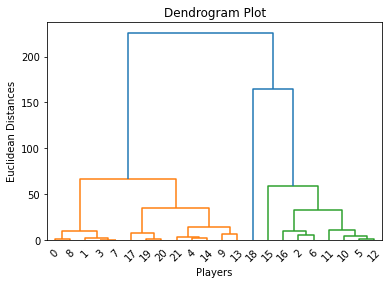

In [17]:
x = cluster_df.iloc[:, [10]].values
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
mtp.title("Dendrogram Plot")  
mtp.ylabel("Euclidean Distances")  
mtp.xlabel("Players")  
mtp.show()

### training the hierarchical model on dataset  

Agglomerative cluistering is implemented. Currently only two clusters is taken - good and bad

In [18]:
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x)  
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1],
      dtype=int64)

### selecting the best performing cluster

In [19]:
result_df = pd.DataFrame()
indx_1 = []
indx_0 = []
for idx, cluster in enumerate(y_pred) :
    if cluster == 1 : indx_1.append(idx)
    else : indx_0.append(idx)

df_1 = cluster_df.iloc[indx_1]
df_0 = cluster_df.iloc[indx_0]
if 0 in df_1['scale'].values : result_df = df_1
else : result_df = df_0

result_df

,player,strike_rate,avg,economy,avg_wkts_per_match,batting_rate,bowling_rate,batter,bowler,all_rounder,scale
0,MS Dhoni,90.094518,44.962264,4.250000,0.000000,2.003781,0.000000,1,0,0,6.723103
1,G Gambhir,88.629118,46.333333,0.000000,0.000000,1.912859,0.000000,1,0,0,1.880516
3,V Kohli,90.612245,48.260870,5.940100,0.000000,1.877551,0.000000,1,0,0,0.000000
4,SR Tendulkar,87.065637,36.567568,5.338983,0.500000,2.380952,0.250000,1,0,0,26.811594
7,Z Khan,65.979381,7.111111,4.991186,1.444444,9.278351,2.086420,0,1,0,0.000000
8,Harbhajan Singh,59.829060,6.363636,4.134809,1.390244,9.401709,1.932778,0,1,0,7.363889
9,MM Patel,85.714286,5.000000,4.508475,1.285714,17.142857,1.653061,0,1,0,20.770438
13,KC Sangakkara,82.411436,38.434783,0.000000,0.000000,2.144189,0.000000,1,0,0,14.201367
14,DPMD Jayawardene,77.118644,31.972973,8.000000,0.000000,2.411995,0.000000,1,0,0,28.464940
17,S Randiv,68.396226,14.500000,5.023659,1.071429,4.716981,1.147959,0,1,0,44.979471


In [20]:
odi_men['Date'] = pd.to_datetime(odi_men['Innings Date'])
odi_men.sort_values(by='Date', inplace=True)
main_df = odi_men.loc[odi_men['Innings Player'].isin(result_df['player'].values) ]
# main_df['Date'] = pd.to_datetime(main_df['Innings Date'])
# main_df.sort_values(by='Date', inplace=True)
main_df

,Innings Player,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Batting Strike Rate,Opposition,Ground,Innings Date,Country,Innings Overs Bowled,Innings Bowled Flag,Innings Runs Conceded,Innings Wickets Taken,Innings Economy Rate,Date
299512,KC Sangakkara,NaN,NaN,NaN,NaN,NaN,NaN,v South Africa,Paarl,2001/01/09,Sri Lanka,DNB,0.0,-,-,-,2001-01-09
299511,DPMD Jayawardene,NaN,NaN,NaN,NaN,NaN,NaN,v South Africa,Paarl,2001/01/09,Sri Lanka,DNB,0.0,-,-,-,2001-01-09
174956,KC Sangakkara,16,10,1.0,1.0,10,160.00,v South Africa,Paarl,2001/01/09,Sri Lanka,NaN,NaN,NaN,NaN,NaN,2001-01-09
299145,M Muralitharan,NaN,NaN,NaN,NaN,NaN,NaN,v South Africa,Paarl,2001/01/09,Sri Lanka,10.0,1.0,39,0,3.90,2001-01-09
174556,DPMD Jayawardene,22,20,1.0,0.0,16,137.50,v South Africa,Paarl,2001/01/09,Sri Lanka,NaN,NaN,NaN,NaN,NaN,2001-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259085,V Kohli,9,20,1.0,0.0,12,75.00,v New Zealand,Mount Maunganui,2020/02/11,India,NaN,NaN,NaN,NaN,NaN,2020-02-11
168040,V Kohli,NaN,NaN,NaN,NaN,NaN,NaN,v New Zealand,Mount Maunganui,2020/02/11,India,DNB,0.0,-,-,-,2020-02-11
40804,V Kohli,9,20,1.0,0.0,12,75.00,v New Zealand,Mount Maunganui,2020/02/11,India,NaN,NaN,NaN,NaN,NaN,2020-02-11
277076,V Kohli,NaN,NaN,NaN,NaN,NaN,NaN,v New Zealand,Mount Maunganui,2020/02/11,India,DNB,0.0,-,-,-,2020-02-11


### Selecting data based on the Ground

and do the same scaling algorithm on the dataset

In [21]:
main_df = main_df.loc[main_df['Ground'] == 'Mumbai' ]
main_df.fillna(0, inplace = True)
main_df.replace('-', 0, inplace = True)
main_df.replace('sub', 0, inplace = True)
main_df.replace('DNB', 0, inplace = True)
stats = {}
for indx, row in main_df.iterrows() :
    if row["Innings Player"] not in stats :
        stats[row["Innings Player"]] = {'runs' : int(row['Innings Runs Scored Num']), 
                                        'balls' : int(row['Innings Balls Faced']) ,
                                        'not_out' : 1, 'num_of_matches' : 1 ,
                                       'matches_batted' : 0, 'matches_bowled' : 0 ,
                                       'overs_bowled' : float(row['Innings Overs Bowled']),
                                       'runs_conceded' : int(row['Innings Runs Conceded']),
                                       'wickets' : int(row['Innings Wickets Taken'])}
        if row['Innings Not Out Flag'] == 0.0 :
            stats[row["Innings Player"]]['not_out' ] = 0
    else :
        stats[row["Innings Player"]]['runs'] += int(row['Innings Runs Scored Num'])
        stats[row["Innings Player"]]['balls'] += int(row['Innings Balls Faced'])
        stats[row["Innings Player"]]['not_out'] += int(row['Innings Not Out Flag'])
        stats[row["Innings Player"]]['num_of_matches'] += 1
        stats[row["Innings Player"]]['overs_bowled'] += float(row['Innings Overs Bowled'])
        stats[row["Innings Player"]]['runs_conceded'] += int(row['Innings Runs Conceded'])
        stats[row["Innings Player"]]['wickets'] += int(row['Innings Wickets Taken'])
        
    
    if row['Innings Batted Flag'] == 1.0 :
        stats[row["Innings Player"]]['matches_batted'] += 1
    if row['Innings Bowled Flag'] == 1.0 :
        stats[row["Innings Player"]]['matches_bowled'] += 1
        
for player in stats :
    
    if stats[player]['matches_batted'] != 0 :
        stats[player]['strike_rate'] = stats[player]['runs'] / stats[player]['balls'] * 100
        stats[player]['avg']         = stats[player]['runs'] / stats[player]['matches_batted']
        stats[player]['not_out_rate']= stats[player]['not_out'] / stats[player]['matches_batted'] *100
    else :
        stats[player]['strike_rate'] = stats[player]['avg'] = stats[player]['not_out_rate'] = 0.0

    if stats[player]['matches_bowled'] != 0 :
        bowls = math.ceil((stats[player]['overs_bowled'] % int(stats[player]['overs_bowled'])) * 10)
        if bowls > 5 :
            stats[player]['overs_bowled'] = int(stats[player]['overs_bowled']) + ( (bowls//6) + ( (bowls - (bowls//6) * 6)  / 10) )
            
        stats[player]['economy']     = stats[player]['runs_conceded'] / stats[player]['overs_bowled']
        stats[player]['avg_wkts_per_match'] = stats[player]['wickets'] / stats[player]['matches_bowled']
        
    else :
        stats[player]['economy'] = stats[player]['avg_wkts_per_match'] = 0.0

stats_df = pd.DataFrame()
for i in stats :
    stats[i].update({'player' : i})
    # stats_df = stats_df.append(pd.DataFrame.from_dict([stats[i]]), ignore_index=True)
    stats_df = pd.concat([stats_df, pd.DataFrame.from_dict([stats[i]])], ignore_index=True)
    
cluster_df = stats_df[['player', 'strike_rate', 'avg' , 'economy' , 'avg_wkts_per_match']]

batting_rate = []
bowling_rate = []
for index, row in cluster_df.iterrows():
    if row['economy'] * row['avg_wkts_per_match'] != 0.0 : 
        bowling_rate.append(row['economy'] * row['avg_wkts_per_match'] / (row['economy'] / row['avg_wkts_per_match']))
    else :
        bowling_rate.append( row['economy'] * row['avg_wkts_per_match'])
    try : 
        batting_rate.append( row['strike_rate'] / row['avg'])
    except Exception as err :
        batting_rate.append(100.0)

# cluster_df['batting_rate'] = batting_rate
cluster_df = cluster_df.assign(batting_rate=batting_rate)
# cluster_df['bowling_rate']  = bowling_rate
cluster_df = cluster_df.assign(bowling_rate=bowling_rate)

cluster_df = cluster_df.assign(batter=[0,1,0,1,1,1,1,0,0,0,0,0,1])
cluster_df = cluster_df.assign(bowler=[1,0,1,0,0,0,0,1,1,1,1,1,0])
cluster_df = cluster_df.assign(all_rounder=[0,0,0,0,0,0,0,0,0,0,0,0,0])

scale = []
for index, rows in cluster_df.iterrows() :
    if rows['batter'] == 1 :
        try :
            scale.append(abs(min(batting_rate) - rows['batting_rate']) / min(batting_rate) * 100)
        except Exception as err :
            scale.append(100)
    elif rows['bowler'] == 1:
        try :
            scale.append(abs(max(bowling_rate) - rows['bowling_rate']) / max(bowling_rate) * 100)
        except Exception as err :
            scale.append(100)
    elif rows['all_rounder'] == 1 :
        try :
            scale.append( (abs(min(batting_rate) - rows['batting_rate']) / min(batting_rate) * 100 +
                          abs(max(bowling_rate) - rows['bowling_rate']) / max(bowling_rate) * 100) / 2 )
        except Exception as err :
            scale.append(100)
cluster_df = cluster_df.assign(scale=scale)

cluster_df

,player,strike_rate,avg,economy,avg_wkts_per_match,batting_rate,bowling_rate,batter,bowler,all_rounder,scale
0,Harbhajan Singh,42.253521,7.500000,4.736842,1.666667,5.633803,2.777778,0,1,0,30.555556
1,SR Tendulkar,79.255319,29.800000,4.846154,0.333333,2.659574,0.111111,1,0,0,159.308511
2,Z Khan,70.588235,18.000000,5.615385,1.333333,3.921569,1.777778,0,1,0,55.555556
3,G Gambhir,72.592593,32.666667,0.000000,0.000000,2.222222,0.000000,1,0,0,116.666667
4,MS Dhoni,85.365854,29.166667,0.000000,0.000000,2.926829,0.000000,1,0,0,185.365854
5,DPMD Jayawardene,94.943820,84.500000,0.000000,0.000000,1.123596,0.000000,1,0,0,9.550562
6,KC Sangakkara,81.538462,79.500000,0.000000,0.000000,1.025641,0.000000,1,0,0,0.000000
7,KMDN Kulasekara,91.666667,16.500000,5.413043,0.500000,5.555556,0.250000,0,1,0,93.750000
8,SL Malinga,150.000000,6.000000,5.714286,1.500000,25.000000,2.250000,0,1,0,43.750000
9,M Muralitharan,233.333333,7.000000,4.000000,2.000000,33.333333,4.000000,0,1,0,0.000000


### FE

form is an important feature determining the performance

form is calculated separately for batters and bowlers for last 15 games

In [22]:
form = {}
for player in result_df['player'].values :
    all_rounder = False
    
    if not result_df.loc[(result_df['player'] == player) & (result_df['batter'] == 1)].empty :
        _tmp = odi_men.loc[(odi_men['Innings Player'] == player) & (odi_men['Innings Batted Flag'] == 1.0)]
    elif not result_df.loc[(result_df['player'] == player) & (result_df['bowler'] == 1)].empty :
        _tmp = odi_men.loc[(odi_men['Innings Player'] == player) & (odi_men['Innings Bowled Flag'] == 1.0)]
    elif not result_df.loc[(result_df['player'] == player) & (result_df['all_rounder'] == 1)].empty :
        _tmp = odi_men.loc[(odi_men['Innings Player'] == player) & ((odi_men['Innings Bowled Flag'] == 1.0) | (odi_men['Innings Batted Flag'] == 1.0)) ]
        all_rounder = True
        
    _tmp = _tmp.tail(15)
    good = 0
    for indx, rows in _tmp.iterrows() :
        
        if (not result_df.loc[(result_df['player'] == player) & (result_df['batter'] == 1)].empty) | all_rounder :
            try :
                if ((int(rows['Innings Runs Scored Num']) > 40) & (float(rows['Innings Batting Strike Rate']) > 70.0)) | (float(rows['Innings Batting Strike Rate']) > 100):
                    good += 1
            except Exception as err :
                pass
            continue
        if (not result_df.loc[(result_df['player'] == player) & (result_df['bowler'] == 1)].empty) | all_rounder :
            try :
                if (int(rows['Innings Wickets Taken']) >= 2) | ((float(rows['Innings Economy Rate']) < 6.0) & (float(rows['Innings Overs Bowled']) > 5.0 )):
                    good += 1
            except Exception as err :
                pass
            continue
        
        if good >= 8 :
            break
    if good >= 8 :
        form[player] = 1
    else :
        form[player] = 0
print(form)


{'MS Dhoni': 1, 'G Gambhir': 0, 'V Kohli': 1, 'SR Tendulkar': 1, 'Z Khan': 0, 'Harbhajan Singh': 1, 'MM Patel': 0, 'KC Sangakkara': 1, 'DPMD Jayawardene': 0, 'S Randiv': 1, 'KMDN Kulasekara': 0, 'SL Malinga': 1, 'M Muralitharan': 1}


In [23]:
form_list = []
for indx, rows in cluster_df.iterrows() :
    form_list.append(form[rows['player']])

cluster_df = cluster_df.assign(form=form_list)
cluster_df = cluster_df.loc[ cluster_df['form'] == 1 ]
cluster_df.sort_values(by='scale', ignore_index=True, inplace=True)
cluster_df

,player,strike_rate,avg,economy,avg_wkts_per_match,batting_rate,bowling_rate,batter,bowler,all_rounder,scale,form
0,KC Sangakkara,81.538462,79.500000,0.000000,0.000000,1.025641,0.000000,1,0,0,0.000000,1
1,M Muralitharan,233.333333,7.000000,4.000000,2.000000,33.333333,4.000000,0,1,0,0.000000,1
2,Harbhajan Singh,42.253521,7.500000,4.736842,1.666667,5.633803,2.777778,0,1,0,30.555556,1
3,SL Malinga,150.000000,6.000000,5.714286,1.500000,25.000000,2.250000,0,1,0,43.750000,1
4,V Kohli,90.443686,53.000000,4.857143,0.000000,1.706485,0.000000,1,0,0,66.382253,1
5,S Randiv,0.000000,0.000000,4.777778,0.000000,100.000000,0.000000,0,1,0,100.000000,1
6,SR Tendulkar,79.255319,29.800000,4.846154,0.333333,2.659574,0.111111,1,0,0,159.308511,1
7,MS Dhoni,85.365854,29.166667,0.000000,0.000000,2.926829,0.000000,1,0,0,185.365854,1


From the above data we can derive the significant players of the match.
1. KC Sangakkara is the notable batter
2. M Muralitharan is the notable bowler